In [26]:
import os
import numpy as np
import pandas as pd
import torchvision.transforms as transforms
from torchvision.io import read_image
from torchvision import datasets, utils
from torch.utils.data import Dataset
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
      self.img_labels = pd.read_csv(annotations_file)
      self.img_dir = img_dir
      self.transform = transform
      self.target_transform = target_transform

    def __len__(self):
      return len(self.img_labels)

    def __getitem__(self, idx):
      img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
      image = read_image(img_path)
      label = self.img_labels.iloc[idx, 1]
      if self.transform:
          image = self.transform(image)
      if self.target_transform:
          label = self.target_transform(label)
      return image, label

In [ ]:
def get_mean_std(data_dir, label_csv):
    '''
    이미지 정규화 시 성능 향상 , 평균과 표준편차로 정규화 실행
    data_dir = 이미지 들어있는 폴더 path
    '''
    transform = transforms.Compose([
                                    transforms.ToPILImage(),
                                    transforms.Resize((512, 512)),
                                    transforms.ToTensor()
    ])

    dataset = CustomImageDataset(annotations_file=label_csv, img_dir=data_dir, transform=transform)

    meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x,_ in tqdm(dataset)]
    stdRGB = [np.std(x.numpy(), axis=(1,2)) for x,_ in tqdm(dataset)]

    meanR = np.mean([m[0] for m in meanRGB])
    meanG = np.mean([m[1] for m in meanRGB])
    meanB = np.mean([m[2] for m in meanRGB])

    stdR = np.mean([s[0] for s in stdRGB])
    stdG = np.mean([s[1] for s in stdRGB])
    stdB = np.mean([s[2] for s in stdRGB])
    print("평균",meanR, meanG, meanB)
    print("표준편차",stdR, stdG, stdB)

In [ ]:
# train data, test data 다르게 nomalization 적용하려면 data_dir 바꾸세요.
data_dir = '/content/drive/MyDrive/ZINDI-image/train'
label_csv = '/content/drive/MyDrive/ZINDI-image/csv_files/Train.csv'
get_mean_std(data_dir, label_csv)

100%|██████████| 1619/1619 [00:44<00:00, 35.98it/s]

평균 0.44280738 0.5332802 0.33625707
표준편차 0.17611444 0.1734216 0.17963623


In [27]:
data_dir = '/content/drive/MyDrive/ZINDI-image/train'
label_csv = '/content/drive/MyDrive/ZINDI-image/csv_files/Train.csv'

transform = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize((512, 512)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomVerticalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize([0.44280738, 0.5332802, 0.33625707], [0.17611444, 0.1734216, 0.17963623])
                                ])

train_ds = CustomImageDataset(annotations_file=label_csv, img_dir=data_dir, transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


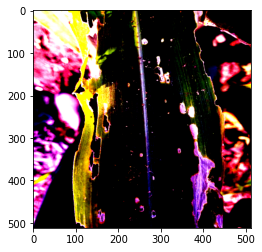

Label: 1


In [33]:
for img,lbl in train_ds:
  plt.imshow(img.permute(1, 2, 0))
  plt.show()
  print(f"Label: {lbl}")
  break